In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

# **Single input Variable KNN regression**
X1 = Input<br>
X2 = Output

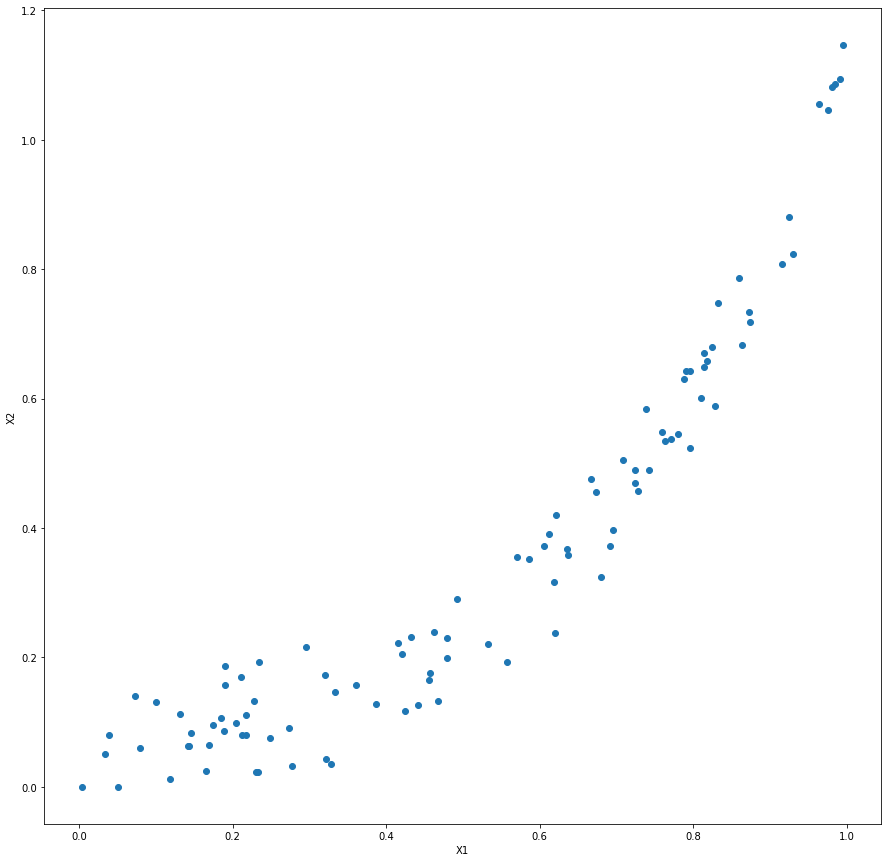

In [ ]:
# Create Data
numData = 100
x = np.random.random((numData))
y = np.zeros(x.shape[0])
for i in range(x.shape[0]):
    y[i] = x[i]*x[i]*x[i] + np.random.randint(0, 20, 1)/100

data = np.array([[i, j] for i, j in list(zip(x, y))])
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# Normalize
X = data.copy()
for i in range(data.shape[1]):
    X[:, i] = (data[:, i] - np.min(data[:, i]))/(np.max(data[:, i]) - np.min(data[:, i]))

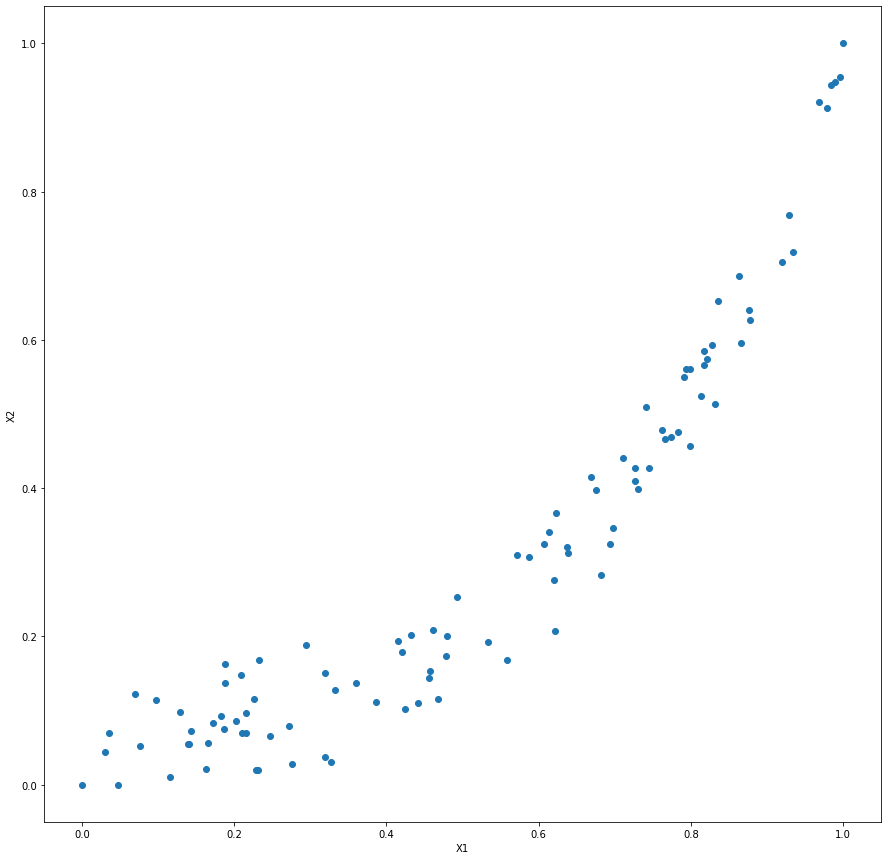

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# single variable KNN regression
def KnnRegression(X_test, X_data, Nmin):
    # Find distance
    dist = np.zeros(X_data.shape[0])
    for i in range(X_data.shape[0]):
        d = np.power(X_test - X_data[i, 0], 2)
        dist[i] = np.sqrt(np.sum(d))

    # find N-first of minimum distance
    temp_dist = dist.copy()
    temp_dist.sort()
    temp_dist = temp_dist[0:Nmin]
    idx_min = np.array([int(np.where(dist == temp_dist[i])[0]) for i in range(Nmin)])

    # find average of output
    avg = np.mean(X_data[idx_min], axis=0)[1]

    return np.array([X_test, avg])

In [ ]:
for i in range(3, 30):
    lineRegression = np.zeros((numData, 2))
    for j in range(numData):
        lineRegression[j] = KnnRegression(X[j, 0], X, i)

    lineRegression = np.sort(lineRegression, axis=0)

    plt.scatter(X[:, 0], X[:, 1], color='r')
    plt.plot(lineRegression[:, 0], lineRegression[:, 1], color='g', linewidth=3)
    plt.title('k = ' + str(i))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# **Multiple input variable KNN regression**

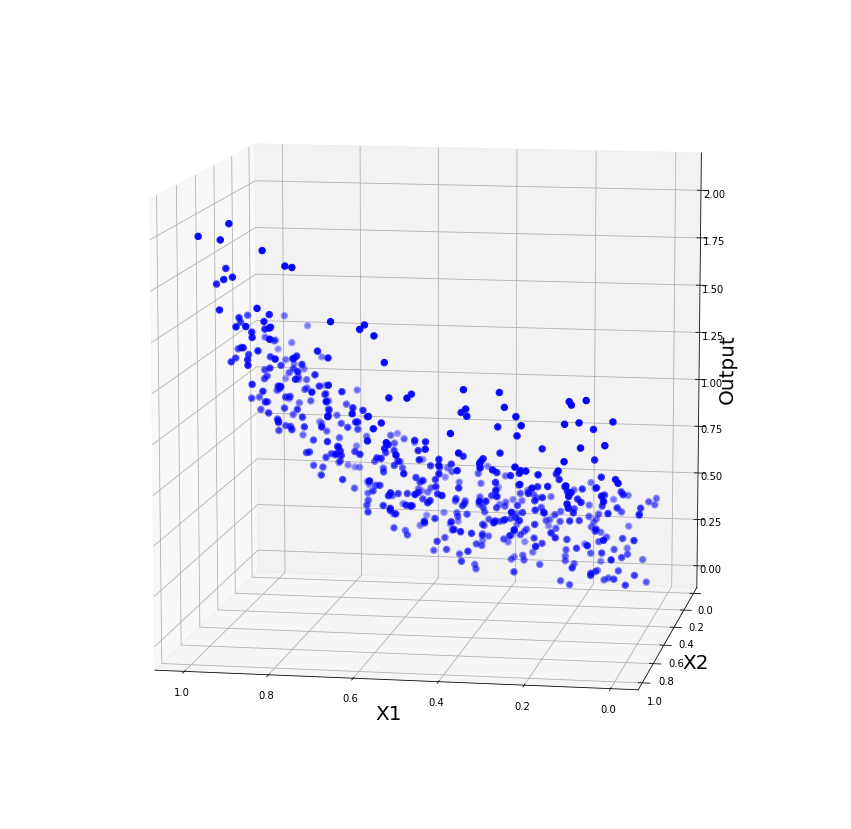

In [ ]:
# Create Data
numData = 500
x = np.random.random((numData))
y = np.random.random((numData))
z = np.zeros(x.shape[0])
for i in range(x.shape[0]):
    z[i] = x[i]*x[i]*x[i]+ y[i]*y[i]*y[i] + np.random.randint(0, 50, 1)/100

X_data = np.array([[i, j, k] for i, j, k in list(zip(x, y, z))])

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_data[:, 0], X_data[:, 1], X_data[:, 2], color='b', linewidth=3)
ax.set_xlabel('X1', fontsize=20)
ax.set_ylabel('X2', fontsize=20)
ax.set_zlabel('Output', fontsize=20)
ax.view_init(10, 100)  # X rotate horizental axis , Y rotate vertical axis
plt.rcParams["figure.figsize"] = (15, 15)
plt.show()

In [ ]:
# Normalize
for i in range(X_input.shape[1]):
    X_data[:, i] = (X_data[:, i] - np.min(X_data[:, i]))/(np.max(X_data[:, i]) - np.min(X_data[:, i]))

In [ ]:
def KnnRegression(X_test, X_data, Nmin):
    # Find distance
    dist = np.zeros(X_data.shape[0])
    for i in range(X_data.shape[0]):
        d = np.power(X_test - X_data[i, 0:-1], 2)
        dist[i] = np.sqrt(np.sum(d))

    # find N-first of minimum distance
    temp_dist = dist.copy()
    temp_dist.sort()
    temp_dist = temp_dist[0:Nmin]
    idx_min = np.array([int(np.where(dist == temp_dist[i])[0]) for i in range(Nmin)])


    # find average of output     ->> need change
    avg = np.mean(X_data[idx_min], axis=0)

    # Tranform distance to wright by using any function such as exponencial, gaussian
    # Calculation Weight average

    return avg

In [ ]:
fig = plt.figure()
for i in range(3, 20):
    out = np.zeros((numData, 3))
    for j in range(numData):
        out[j] = KnnRegression(X_data[j, 0:-1], X_data, i)

    out = np.sort(out, axis=0)

    ax = plt.axes(projection="3d")
    ax.scatter3D(X_data[:, 0], X_data[:, 1], X_data[:, 2], color='r')
    ax.plot(out[:, 0], out[:, 1], out[:, 2], color='g', linewidth=3)
    ax.set_title('k = ' + str(i),  fontsize=20)
    ax.set_xlabel('X1', fontsize=20)
    ax.set_ylabel('X2', fontsize=20)
    ax.set_zlabel('Output', fontsize=20)
    ax.view_init(10, 180)  # X rotate horizental axis , Y rotate vertical axis
    plt.rcParams["figure.figsize"] = (15, 15)
    plt.show()

In [ ]:
import plotly.graph_objects as go
x = np.linspace(0, 100, 100)
y = x*2 + 3

data = np.array([[i, j] for i, j in list(zip(x, y))])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data[0:20, 0], y=data[0:20, 1], mode='markers', name='markers'))
fig.add_trace(go.Scatter(x=data[20:40, 0], y=data[20:40, 1], mode='markers+lines', name='markers+line'))
fig.add_trace(go.Scatter(x=data[40:60, 0], y=data[40:60, 1], mode='lines', name='line'))
fig.show()

In [ ]:
import plotly.graph_objects as go

numData = 500
X = np.random.random((numData))
Y = np.random.random((numData))
Z = np.zeros(numData)
for i in range(numData):
    Z[i] = X[i]*X[i]*X[i]+ Y[i]*Y[i]*Y[i] + np.random.randint(0, 50, 1)/100

fig = go.Figure(data=[go.Scatter3d(x=X, y=Y, z=Z, mode='markers', marker = dict(size = 2, color="#000000"))])
fig.update_layout(autosize=False, width=800, height=800)
fig.show()